# Project II

## Importing Packages to Analyze CSV Files

In [106]:
import pandas as pd
import numpy as np
import math
import array
import os
import datetime
import pytz
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import json
import requests
import statistics

## Defining Functions for Data Analysis

In [4]:
def square(x):
    return x * x

def root(x):
    sroot = np.zeros(len(x))
    i = 0
    
    while i < len(x):
        sroot[i] = math.sqrt(x[i])
        i += 1
    return sroot

def roundtotwodp(x):
    rounded = np.zeros(len(x))
    i = 0
    
    while i < len(x):
        rounded[i] = round(x[i], 2)
        i += 1
    return rounded

def getwindspeed(north,west):
    windspeedsq = square(north) + square(west)
    windspeedr = root(windspeedsq)
    windspeed = roundtotwodp(windspeedr)
    return windspeed

In [5]:
def getwindytimes(windspeed):
    iswindy = (windspeed > 5)
        
    return iswindy

In [6]:
def getrainytimes(rain):
    israiny = (rain > 0.5)
        
    return israiny

0.5 mm/hr chosen as rainy based upon definitions from USGS listed here: https://water.usgs.gov/edu/activity-howmuchrain-metric.html

In [80]:
def daycounter(rain,wind):
    rainy = 0
    windy = 0
    both = 0
    calm = 0
    graph = []
    
    i = 0
    
    while i < len(rain):
        
        if rain[i] >= 0.5 and wind[i] > 5:
            both += 1
            graph.append('orchid')
        if rain[i] >= 0.5 and wind[i] <= 5:
            rainy += 1
            graph.append('lightblue')
        if rain[i] < 0.5 and wind[i] > 5:
            windy += 1
            graph.append('green')
        if rain[i] < 0.5 and wind[i] <= 5:
            calm += 1
            graph.append('orange')
            
        i += 1
        
    return calm,rainy,windy,both,graph

## Time Conversion

In [58]:
ntp_epoch = datetime.datetime(1900,1,1)
unix_epoch = datetime.datetime(1970,1,1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def sectodatetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond = 0)
#.strftime("%A, %B %d, %Y %I:%M:%S")

## Machine to Machine Learning

In [12]:
Username = 'OOIAPI-IEG9BO4BLFWBHA'
Token = 'TEMP-TOKEN-SOSAD7HLVIQWWR'

In [19]:
r_1 = requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(Username, Token))
OOSM_data = r_1.json()

r_2= requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(Username, Token))
OSSM_data = r_2.json()

In [59]:
time_OS = []
rainRate_OS = []
windSpeed_OS = []
time_SS = []
rainRate_SS = []
windSpeed_SS = []

for i in range(len(OOSM_data)-1):
    time_OS.append(sectodatetime(OOSM_data[i]['pk']['time']))
    rainRate_OS.append(OOSM_data[i]["met_rainrte"])
    windSpeed_OS.append(OOSM_data[i]["metbk_a_dcl_instrument-met_relwind_speed"])

for i in range(len(OSSM_data)):
    time_SS.append(sectodatetime(OSSM_data[i]['pk']['time']))
    rainRate_SS.append(OSSM_data[i]["met_rainrte"])
    windSpeed_SS.append(OSSM_data[i]["metbk_a_dcl_instrument-met_relwind_speed"])

## Graphical Data Analysis Section:

### Oregon Offshore Surface Mooring

In [81]:
OScalmcount,OSraincount,OSwindcount,OSbothcount,OSgraph = daycounter(rainRate_OS, windSpeed_OS)

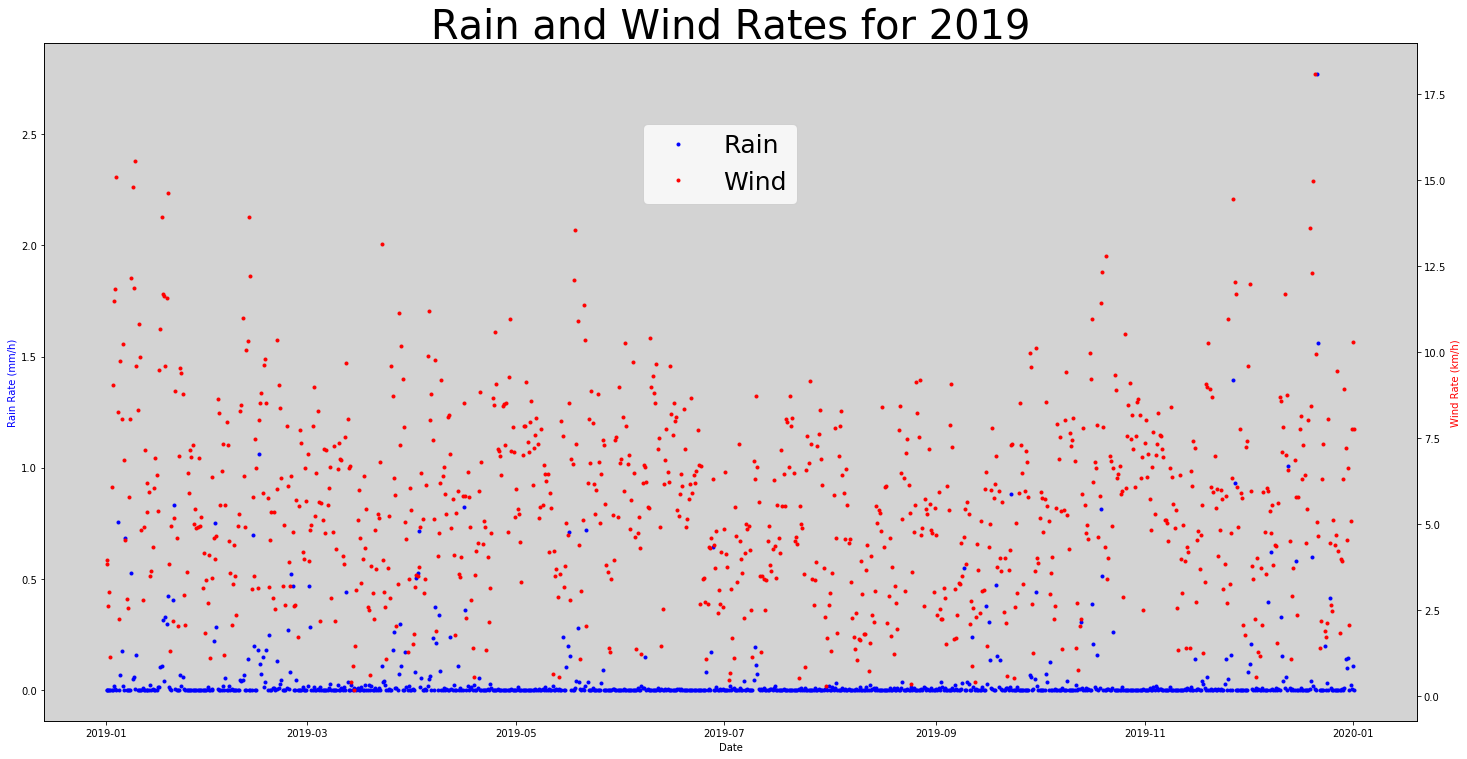

Text(0.5, 1.0, '2019 Weather by Rain and Wind')

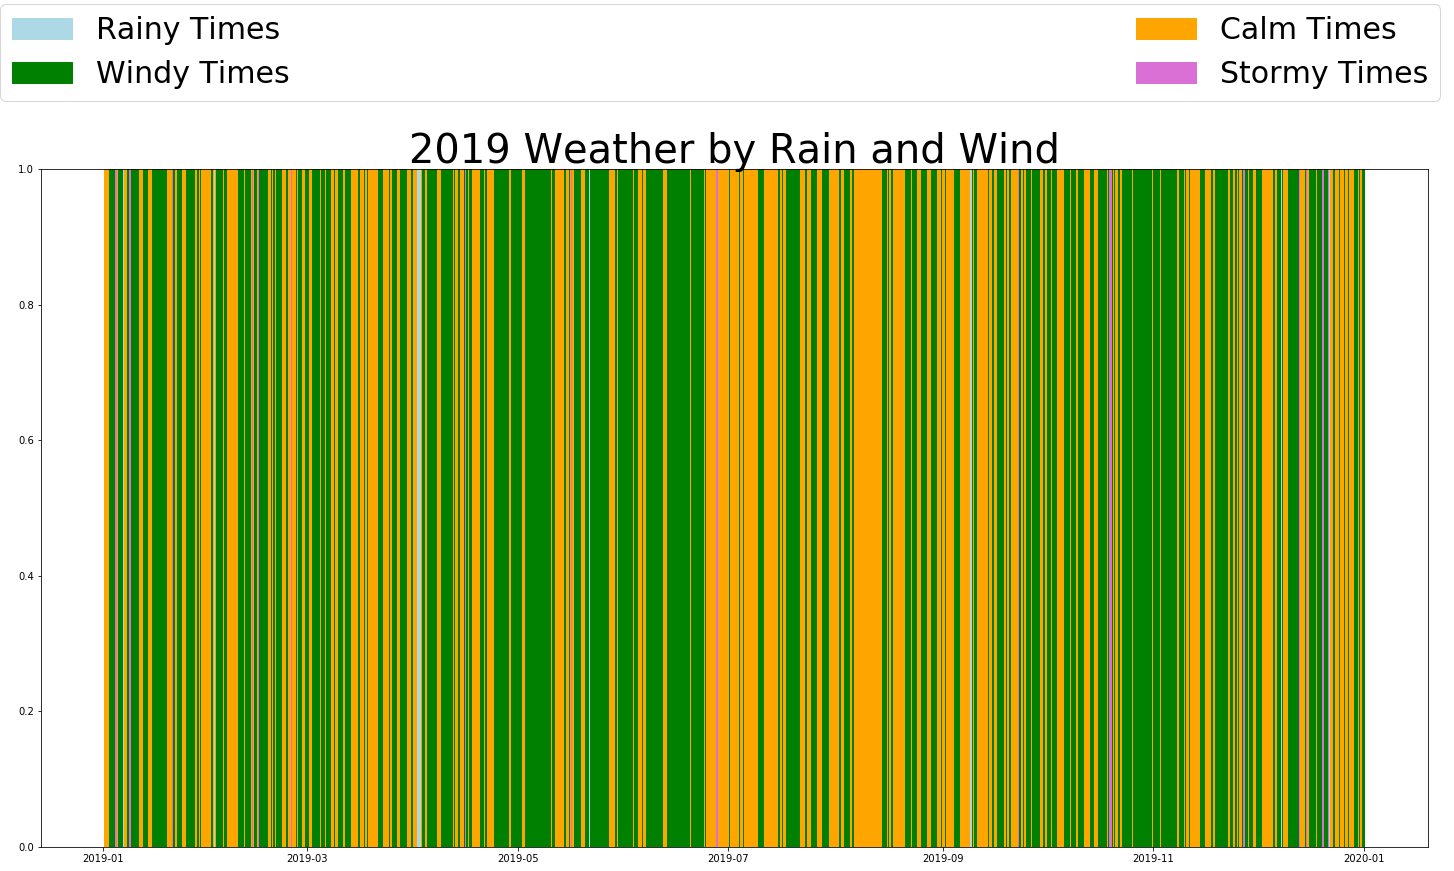

In [134]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_OS, rainRate_OS, '.b', label = 'Rain')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue', fontsize = 20)

ax2.plot(time_OS, windSpeed_OS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (km/h)', color = 'red', fontsize = 20)
fig.legend(loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('Rain and Wind Rates for 2019', fontsize = 40)
plt.show()

fig2,ax = plt.subplots()
fig2.set_figheight(10)
fig2.set_figwidth(20)
fig2.tight_layout()

i = 0

while i < len(time_OS)-1:
    plt.axvspan(time_OS[i],time_OS[i+1], facecolor = OSgraph[i])
    
    i+=1

rain_patch = pch.Patch(color='lightblue', label='Rainy Times')
wind_patch = pch.Patch(color='green', label='Windy Times')
calm_patch = pch.Patch(color='orange', label='Calm Times')
storm_patch = pch.Patch(color='orchid', label='Stormy Times')

fig2.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('2019 Weather by Rain and Wind', fontsize = 40)

In [135]:
print('Rainy but Still:', OSraincount)
print('Windy but Dry:', OSwindcount)
print('Calm:', OScalmcount)
print('Stormy:', OSbothcount)

Rainy but Still: 9
Windy but Dry: 551
Calm: 423
Stormy: 18


In [94]:
time_OS[1].month

1

#### Combined Graph

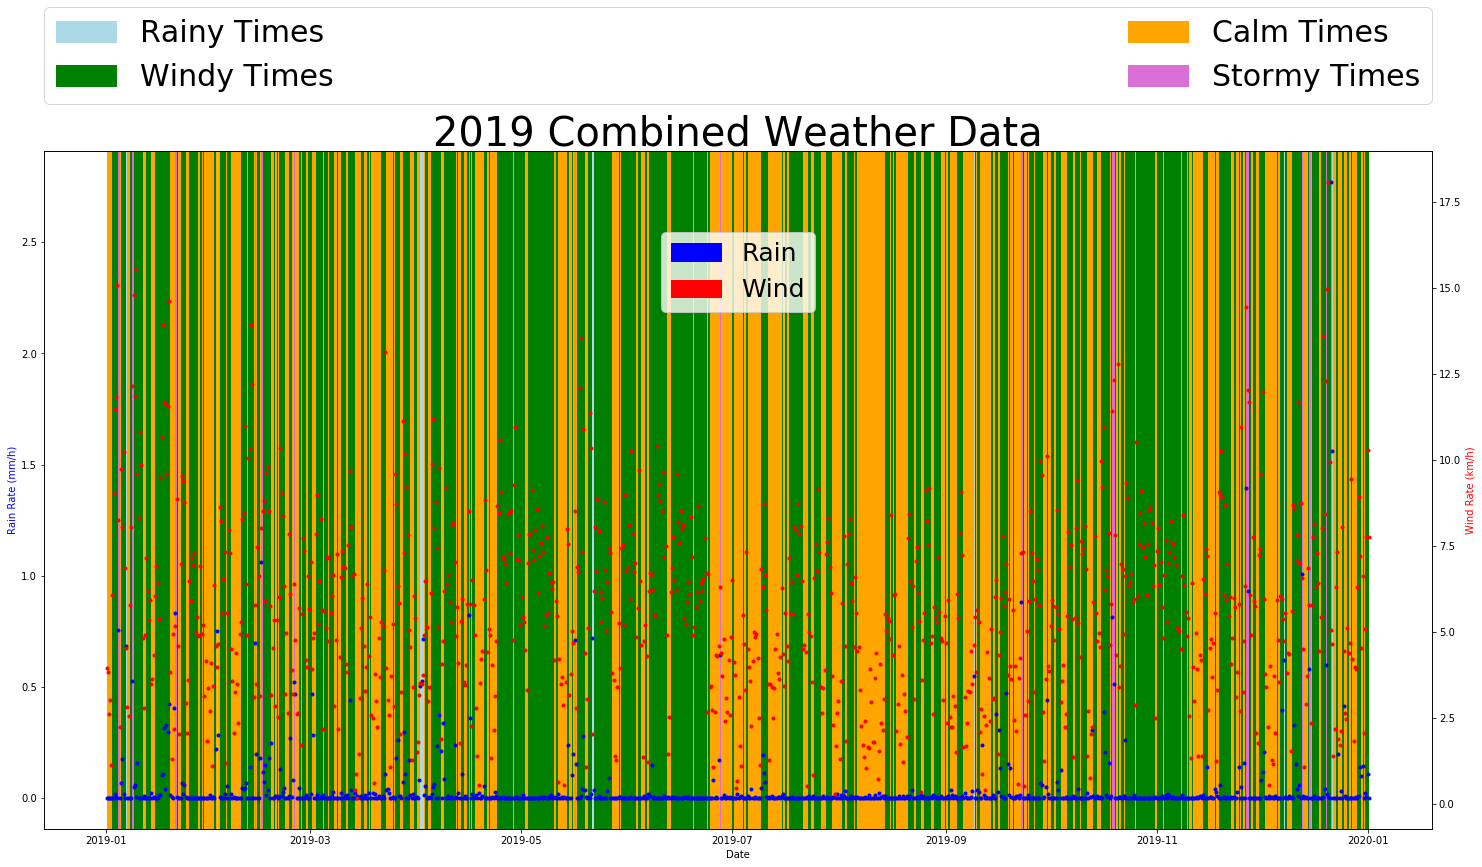

In [136]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_OS, rainRate_OS, '.b', label = 'Rain')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue', fontsize = 20)

i = 0

while i < len(time_OS)-1:
    plt.axvspan(time_OS[i],time_OS[i+1], facecolor = OSgraph[i])
    
    i+=1

ax2 = ax.twinx()
ax2.plot(time_OS, windSpeed_OS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (m/s)', color = 'red', fontsize = 20)

day_legend = plt.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

ax = plt.gca().add_artist(day_legend)

raindot_patch = pch.Patch(color='blue', label='Rain')
winddot_patch = pch.Patch(color='red', label='Wind')
plt.legend(handles = [raindot_patch, winddot_patch], loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('2019 Combined Weather Data', fontsize = 40)

plt.show()

### Oregon Shelf Surface Monitoring

In [137]:
SScalmcount,SSraincount,SSwindcount,SSbothcount,SSgraph = daycounter(rainRate_SS, windSpeed_SS)

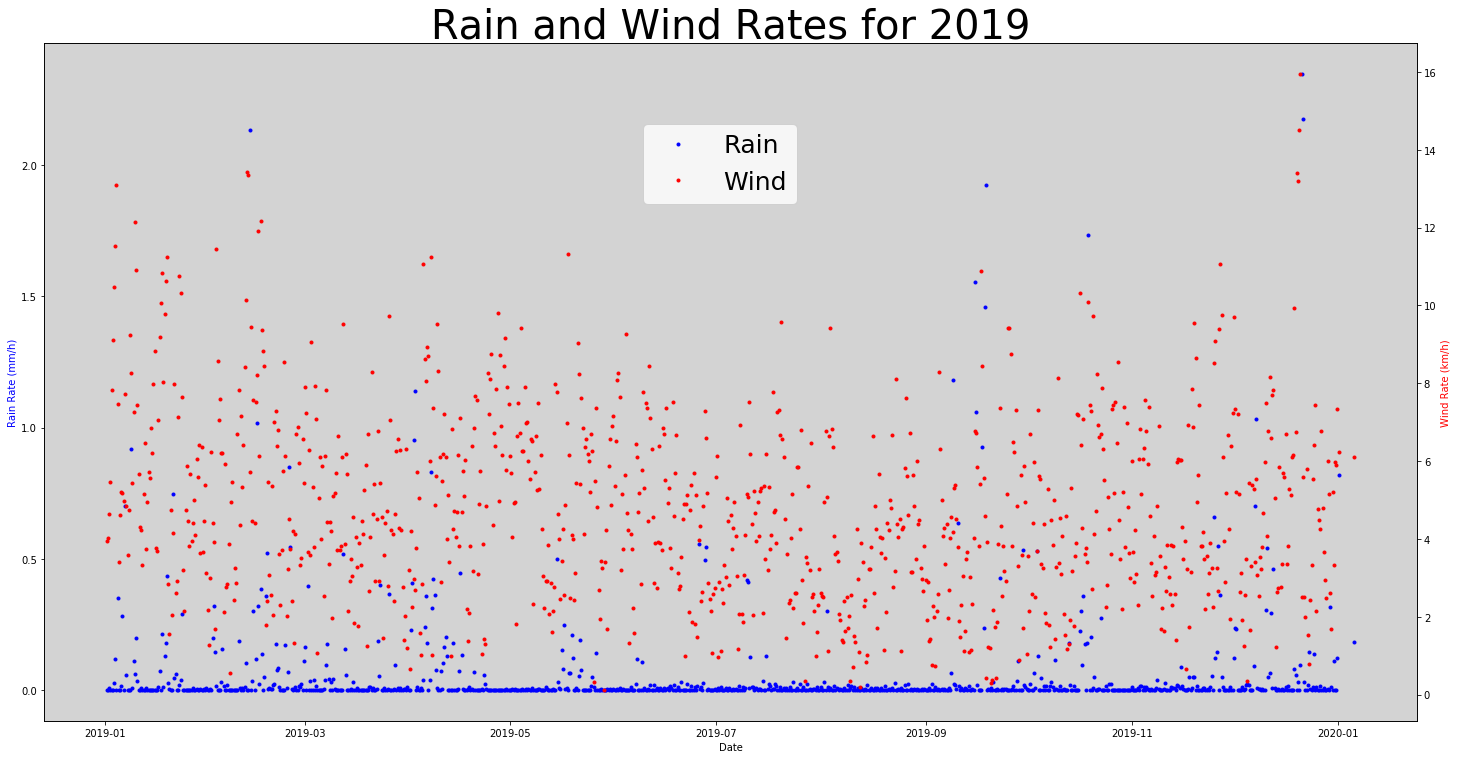

Text(0.5, 1.0, '2019 Weather by Rain and Wind')

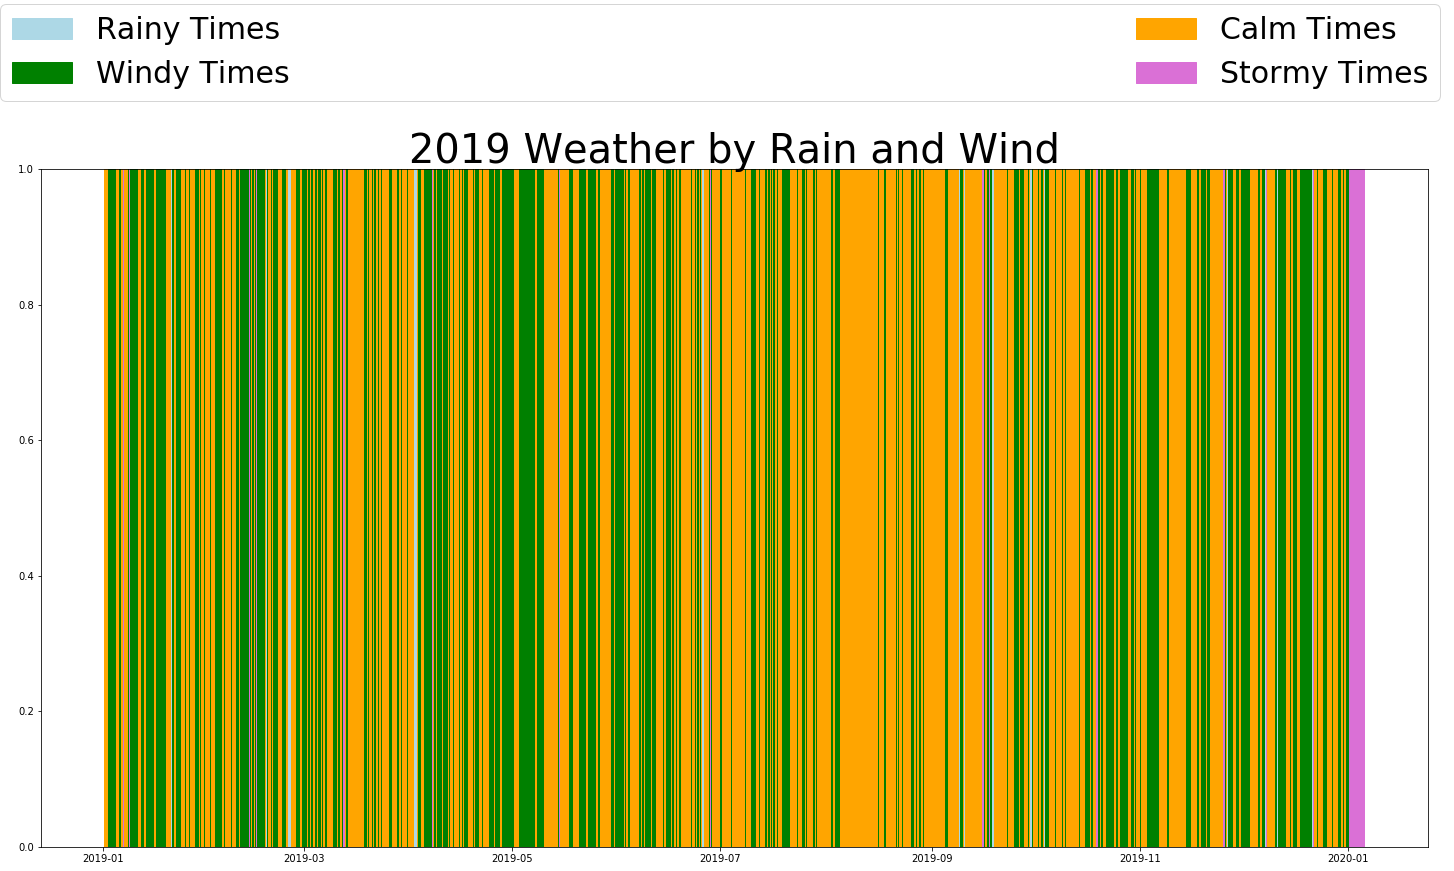

In [138]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_SS, rainRate_SS, '.b', label = 'Rain')
ax.set_facecolor('lightgrey')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue', fontsize = 20)

ax2.plot(time_SS, windSpeed_SS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (m/s)', color = 'red', fontsize = 20)
fig.legend(loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('Rain and Wind Rates for 2019', fontsize = 40)
plt.show()

fig2,ax = plt.subplots()
fig2.set_figheight(10)
fig2.set_figwidth(20)
fig2.tight_layout()

i = 0

while i < len(time_SS)-1:
    plt.axvspan(time_SS[i],time_SS[i+1], facecolor = SSgraph[i])
    
    i+=1

rain_patch = pch.Patch(color='lightblue', label='Rainy Times')
wind_patch = pch.Patch(color='green', label='Windy Times')
calm_patch = pch.Patch(color='orange', label='Calm Times')
storm_patch = pch.Patch(color='orchid', label='Stormy Times')

fig2.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('2019 Weather by Rain and Wind', fontsize = 40)

In [139]:
print('Rainy but Still:', SSraincount)
print('Windy but Dry:', SSwindcount)
print('Calm:', SScalmcount)
print('Stormy:', SSbothcount)

Rainy but Still: 17
Windy but Dry: 409
Calm: 559
Stormy: 16


#### Combined Graph

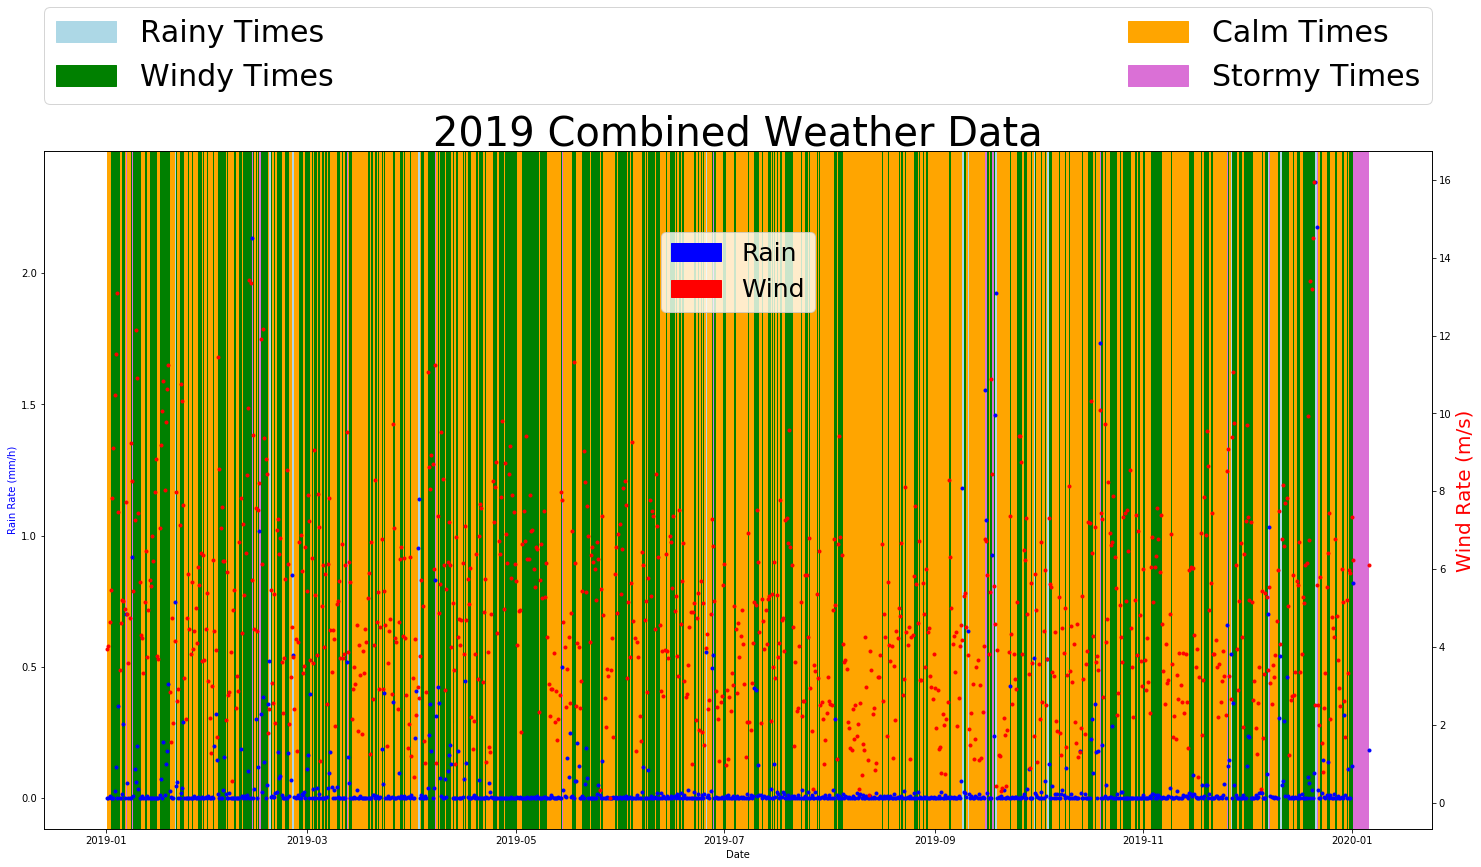

In [203]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(time_SS, rainRate_SS, '.b', label = 'Rain')
ax.set_xlabel('Date')
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue', fontsize = 20)

i = 0

while i < len(time_SS)-1:
    plt.axvspan(time_SS[i],time_SS[i+1], facecolor = SSgraph[i])
    
    i+=1

ax2 = ax.twinx()
ax2.plot(time_SS, windSpeed_SS, '.r', label = 'Wind')
ax2.set_ylabel('Wind Rate (m/s)', color = 'red', fontsize = 20)

day_legend = plt.legend(handles = [rain_patch,wind_patch,calm_patch,storm_patch], prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

ax = plt.gca().add_artist(day_legend)

raindot_patch = pch.Patch(color='blue', label='Rain')
winddot_patch = pch.Patch(color='red', label='Wind')
plt.legend(handles = [raindot_patch, winddot_patch], loc = 'upper center',bbox_to_anchor=(0.5, 0., 0., 0.9), prop={'size':25})
plt.title('2019 Combined Weather Data', fontsize = 40)

plt.show()

## Cross Correlation Comparisons

### Rain Correlation

max correlation is at lag 1


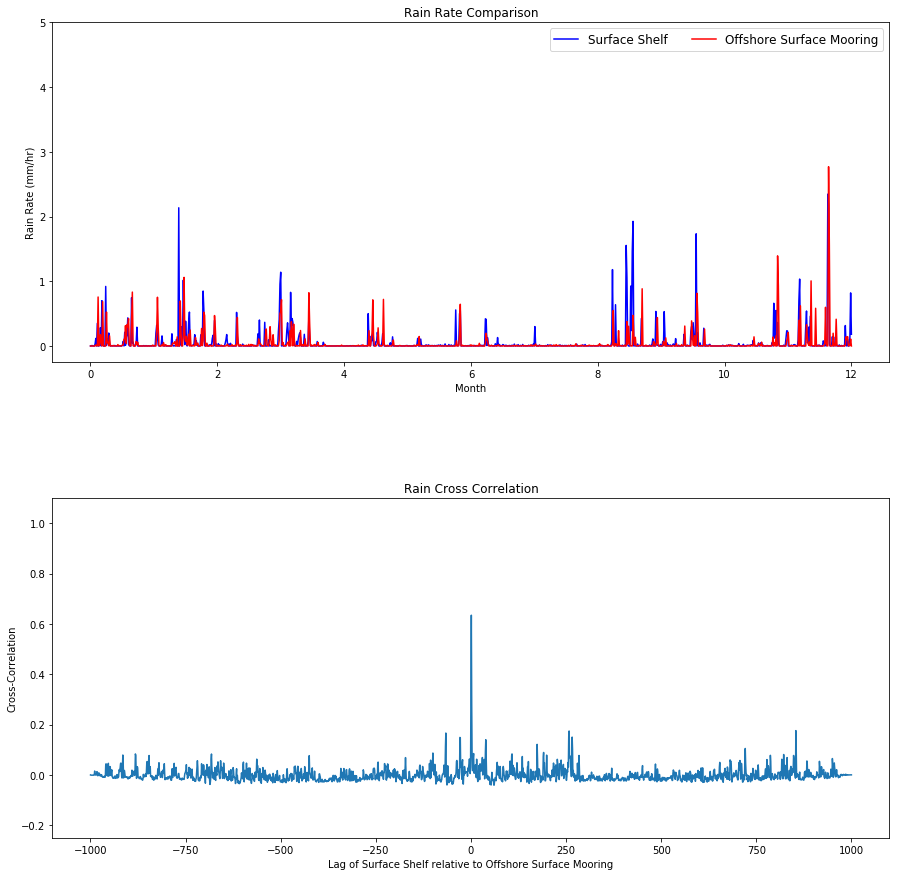

In [166]:
npts = 1001
x = np.linspace(0, 12, npts)

t1=np.asarray(time_OS)
t2=np.asarray(time_SS)

y1=np.asarray(rainRate_OS)
y2=np.asarray(rainRate_SS)


lags = np.arange(-len(t1) + 1, len(t1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax = axs[0]
ax.plot(x, rainRate_SS, 'b', label='Surface Shelf')
ax.plot(x, rainRate_OS, 'r', label='Offshore Surface Mooring')
ax.set_ylim(-0.25, 5)
ax.set_xlabel('Month')
ax.set_ylabel('Rain Rate (mm/hr)')
ax.title.set_text('Rain Rate Comparison')
ax.legend(loc='upper right', fontsize='large', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-0.25, 1.1)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of Surface Shelf relative to Offshore Surface Mooring')
ax.title.set_text('Rain Cross Correlation')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

### Wind Correlation

max correlation is at lag 1


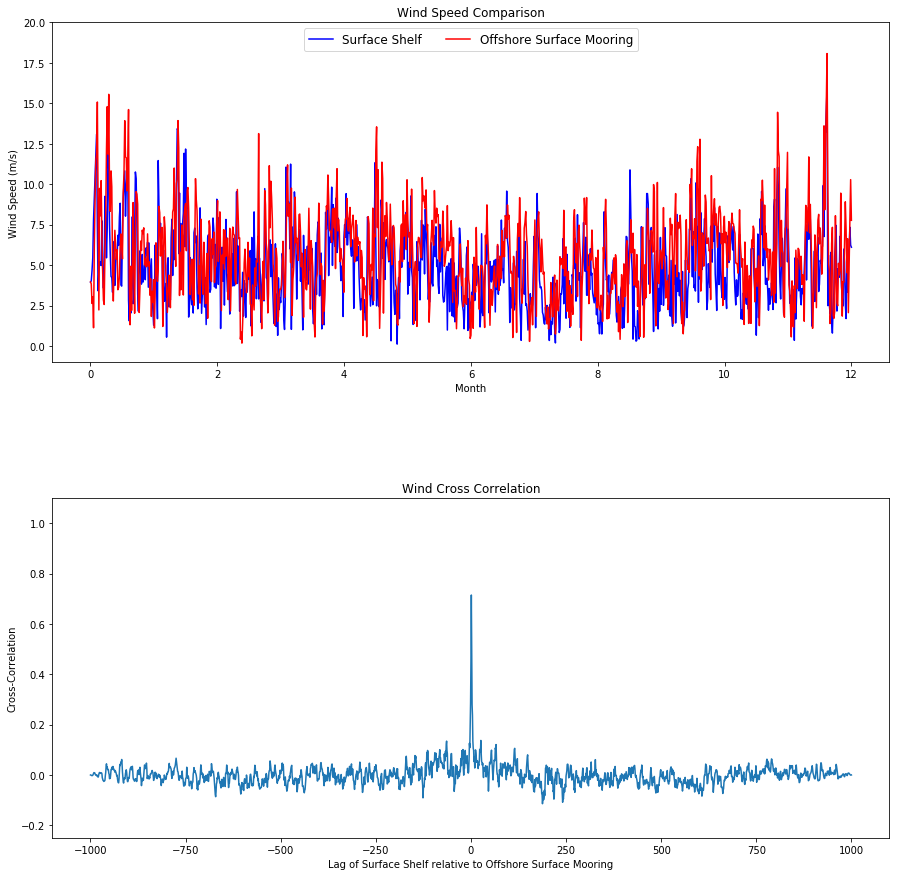

In [163]:
npts = 1001
x = np.linspace(0, 12, npts)

t1=np.asarray(time_OS)
t2=np.asarray(time_SS)

y1=np.asarray(windSpeed_OS)
y2=np.asarray(windSpeed_SS)


lags = np.arange(-len(t1) + 1, len(t1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax = axs[0]
ax.plot(x, windSpeed_SS, 'b', label='Surface Shelf')
ax.plot(x, windSpeed_OS, 'r', label='Offshore Surface Mooring')
ax.set_ylim(-1, 20)
ax.set_xlabel('Month')
ax.set_ylabel('Wind Speed (m/s)')
ax.title.set_text('Wind Speed Comparison')
ax.legend(loc='upper center', fontsize='large', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-0.25, 1.1)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of Surface Shelf relative to Offshore Surface Mooring')
ax.title.set_text('Wind Cross Correlation')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

### Relationship between Wind and Rain Lag

## Monthly Averages:

In [190]:
def monthavg(time,parm):
    # Intakes the time and parameter to be averaged
    monthtracker = []
    
    m = 0 # Month Index
    i = 0 # Total data Index
    c = 0 # Counting Indix for data set within the month to calculate the average.
    parsum = 0 # Variable to hold the summation of parameter values within the month.
    
    while m < 12:
        
        while time_OS[i].month == m+1:
            parsum += parm[i]
            i += 1
            c += 1
        
        monthtracker.append(parsum/c)
        c = 0
        parsum = 0
        m += 1
    
    return monthtracker

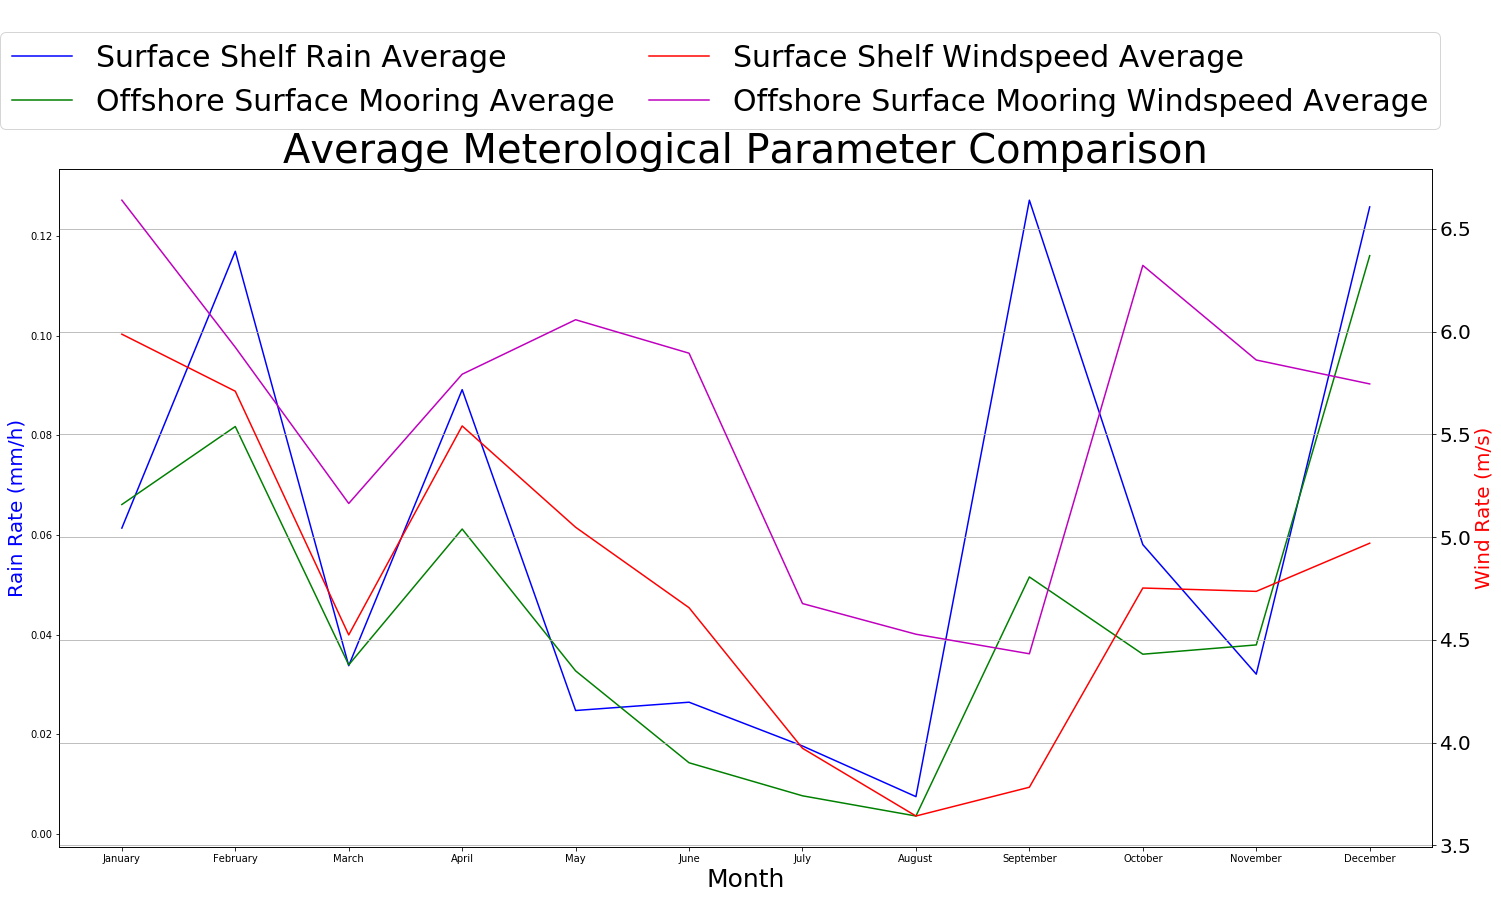

In [219]:
OSrain_avg = monthavg(time_OS,rainRate_OS)
OSwind_avg = monthavg(time_OS,windSpeed_OS)
SSrain_avg = monthavg(time_SS,rainRate_SS)
SSwind_avg = monthavg(time_SS,windSpeed_SS)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig,ax = plt.subplots()
ax2 = ax.twinx()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(months, SSrain_avg, 'b', markersize = 20, label = 'Surface Shelf Rain Average')
ax.plot(months, OSrain_avg, 'g', markersize = 20, label = 'Offshore Surface Mooring Average')
ax.set_xlabel('Month', fontsize = 25)
ax.set_ylabel('Rain Rate (mm/h)', color = 'blue', fontsize = 20)

ax2.plot(months, SSwind_avg, 'r', markersize = 20, label = 'Surface Shelf Windspeed Average')
ax2.plot(months, OSwind_avg, 'm', markersize = 20, label = 'Offshore Surface Mooring Windspeed Average')
ax2.set_ylabel('Wind Rate (m/s)', color = 'red', fontsize = 20)

plt.yticks(size = 20)
plt.grid(True)

fig.legend(prop={'size':30}, bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('Average Meterological Parameter Comparison', fontsize = 40)
plt.show()